<a href="https://colab.research.google.com/github/tohnperfect/mini_DPDM_KKU/blob/main/Data_Mining_with_SciKitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview
*    Scatter plot
*    Normalization
*    Spliting data
*   Classification
    *    K-Nearest Neighbours
    *    Support Vector Machine
    *    Decision tree
    *    Random forests (exercise)
    *    Evaluation
    *    ~Cross Validation~
*   Clustering
    *    K-means clustering




### Load data
https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center

### Import and load data from the internet

In [1]:
import pandas

In [2]:
data = pandas.read_csv('transfusion.data')
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# Scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html
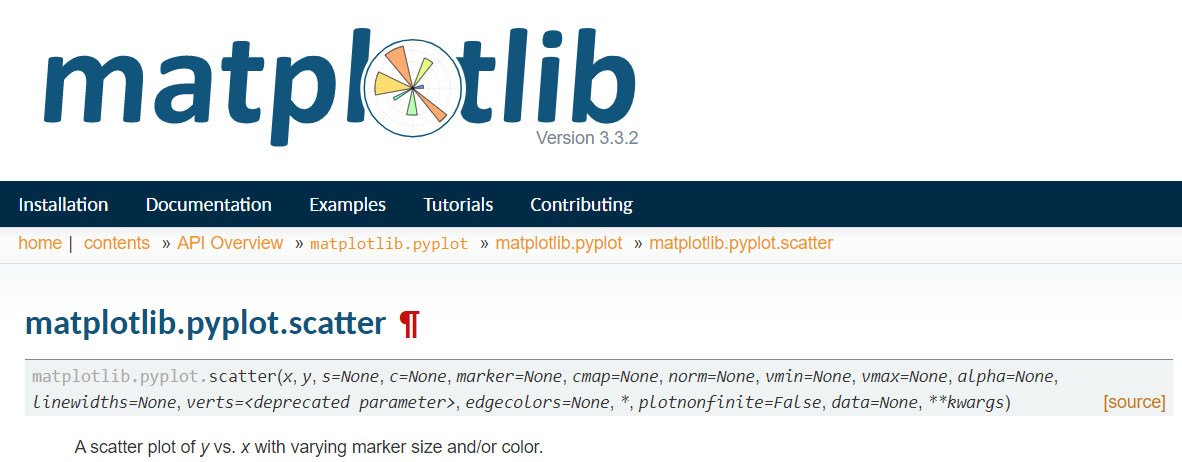

In [3]:
from matplotlib import pyplot as plt

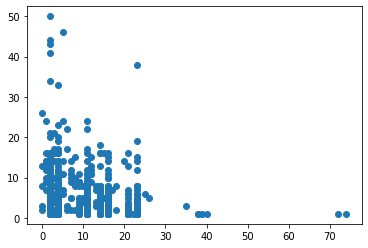

In [4]:
plt.scatter(data['Recency (months)'],data['Frequency (times)'])

In [5]:
zero = data[data['whether he/she donated blood in March 2007']==0]
one = data[data['whether he/she donated blood in March 2007']==1]

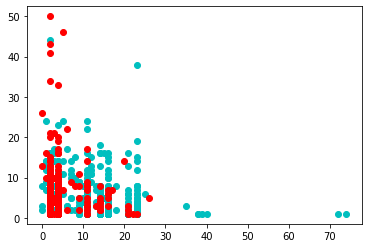

In [6]:
plt.scatter(zero['Recency (months)'],zero['Frequency (times)'],c='c')
plt.scatter(one['Recency (months)'],one['Frequency (times)'],c='r')

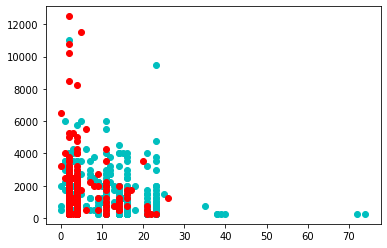

In [7]:
plt.scatter(zero['Recency (months)'],zero['Monetary (c.c. blood)'],c='c')
plt.scatter(one['Recency (months)'],one['Monetary (c.c. blood)'],c='r')

# Normalization

In [8]:
from scipy.stats import zscore

In [9]:
data_z = data.apply(zscore)

# Splitting Data

In [10]:
X = data_z.iloc[:,:-1]
y = data.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
122,-0.927899,0.083164,0.083164,0.275772
71,-0.927899,-0.259572,-0.259572,-0.750483
340,0.555417,-0.259572,-0.259572,-0.175780
544,-1.051508,1.454106,1.454106,2.492483
92,-0.680679,-0.602307,-0.602307,-1.243086
...,...,...,...,...
633,0.308198,1.625474,1.625474,1.507278
189,-0.680679,-0.088204,-0.088204,0.029471
564,-0.680679,1.454106,1.454106,2.123031
149,-0.927899,-0.602307,-0.602307,-0.955734


In [13]:
y_train

122    1
71     0
340    0
544    0
92     0
      ..
633    0
189    1
564    0
149    0
130    0
Name: whether he/she donated blood in March 2007, Length: 598, dtype: int64

# Classification

### K-Nearest Neighbours

Import

In [14]:
from sklearn.neighbors import KNeighborsClassifier

Define

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)

Train (fit)

In [16]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Predict

In [17]:
y_pred = neigh.predict(X_test)

In [18]:
y_score = neigh.predict_proba(X_test)

Evaluate

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test,y_pred)

0.7466666666666667

OR

In [21]:
neigh.score(X_test,y_test)

0.7466666666666667

### Support Vector Machine

Import

In [22]:
from sklearn.svm import SVC

Define

In [23]:
svmClass = SVC()

Train

In [24]:
svmClass.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predict and Evaluation

In [25]:
svmClass.score(X_test,y_test)

0.78

### Decision Tree

Import

In [26]:
from sklearn.tree import DecisionTreeClassifier

Define

In [27]:
tree = DecisionTreeClassifier()

Train

In [28]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predict and Evaluate

In [29]:
tree.score(X_test,y_test)

0.7333333333333333

### Random Forests (Exercise)

In [30]:
from sklearn.ensemble import RandomForestClassifier

### Evaluation
https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

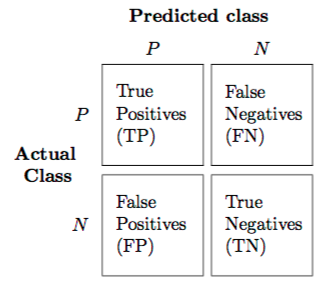

In [32]:
confusion_matrix(y_test,y_pred)

array([[98, 17],
       [21, 14]])

In [33]:
accuracy_score(y_test,y_pred)

0.7466666666666667

In [34]:
precision_score(y_test,y_pred)

0.45161290322580644

In [35]:
recall_score(y_test,y_pred)

0.4

In [36]:
precision, recall, thresholds = precision_recall_curve(y_test,y_score[:,0])

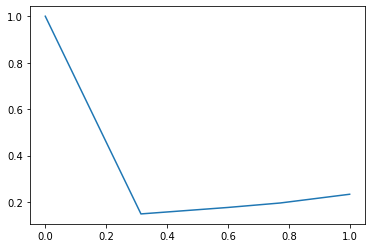

In [37]:
plt.plot(recall,precision)

# Clustering

## Data

In [38]:
from sklearn.datasets import make_blobs

In [39]:
X, y = make_blobs(n_samples=300, centers=3, n_features=2,random_state=6)

In [40]:
X

array([[  7.04597972,  -7.83353716],
       [  7.97212762,  -3.75540854],
       [  8.71445065,  -2.41730491],
       [  6.10733913,  -7.3219719 ],
       [  5.88127851,  -9.28986217],
       [ -8.99419326,   2.30188689],
       [  6.24560173,  -9.5966974 ],
       [ -9.73917222,   1.73527849],
       [ -5.71502839,   0.52948188],
       [  7.30394653,  -3.73431476],
       [  5.2686768 ,  -9.84671751],
       [  8.37409773,  -2.43154653],
       [  6.42985793,  -9.2022557 ],
       [  6.62703535,  -9.54367514],
       [ -5.99249654,   0.79798907],
       [  6.8724751 ,  -3.57103087],
       [ -7.60060951,   1.96481518],
       [ -6.4483813 ,   1.43583503],
       [ -7.29716546,   0.99936611],
       [  7.27059007,  -4.84225716],
       [ -8.12546701,   0.4745911 ],
       [  8.69367788,  -4.73849827],
       [ -8.26946765,   2.34851498],
       [ -7.01428058,   2.55697574],
       [  8.97289681,  -2.56630064],
       [ -8.46875349,   3.29089848],
       [  5.23706377,  -9.44138142],
 

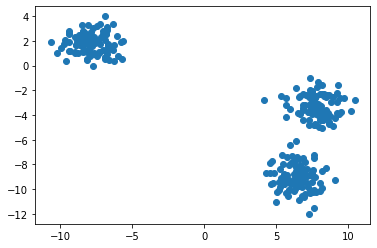

In [41]:
plt.scatter(X[:,0],X[:,1])

Import

In [42]:
from sklearn.cluster import KMeans

Define

In [43]:
KMclust = KMeans(n_clusters=2)

Fit

In [44]:
KMclust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Predict

In [45]:
label = KMclust.predict(X)

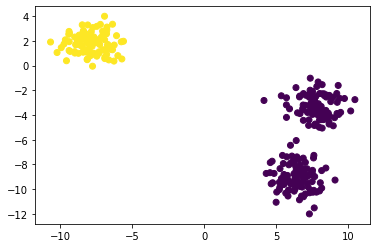

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=label)